<a href="https://colab.research.google.com/github/AlahiraJ/Introduction-to-Covnets/blob/master/Mnist_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<Figure size 720x720 with 0 Axes>

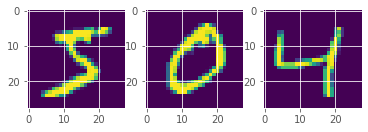

In [0]:
plt.figure(figsize=(10,10))
fig, (ax1, ax2, ax3) = plt.subplots(1,3)

ax1.imshow(x_train[0])

ax2.imshow(x_train[1])

ax3.imshow(x_train[2])

In [0]:
x_train[1].shape

(28, 28)

In [0]:
## reshape data and typecast to float

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [0]:
x_test[1].shape

(28, 28, 1)

In [0]:
## normalize data

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
## encode output

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [0]:
class_num = y_test.shape[1]

In [0]:
## train_test_split

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

In [0]:
## create baseline model

In [0]:
def baseline_model():

  model = Sequential()

  model.add(Conv2D(32, (5,5), input_shape=(28,28, 1), activation='relu'))  ## initialize Conv2D layer with 32 neurons  
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(class_num, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

  return model

In [0]:
model = baseline_model()

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

In [0]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 25, batch_size=250, verbose= 2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 29s - loss: 0.1637 - accuracy: 0.9514 - val_loss: 0.0813 - val_accuracy: 0.9765
Epoch 2/25
 - 28s - loss: 0.0745 - accuracy: 0.9776 - val_loss: 0.0567 - val_accuracy: 0.9819
Epoch 3/25
 - 28s - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0421 - val_accuracy: 0.9858
Epoch 4/25
 - 28s - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0425 - val_accuracy: 0.9865
Epoch 5/25
 - 28s - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0369 - val_accuracy: 0.9874
Epoch 6/25
 - 28s - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0355 - val_accuracy: 0.9875
Epoch 7/25
 - 28s - loss: 0.0262 - accuracy: 0.9918 - val_loss: 0.0328 - val_accuracy: 0.9887
Epoch 8/25
 - 28s - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0335 - val_accuracy: 0.9898
Epoch 9/25
 - 28s - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0355 - val_accuracy: 0.9896
Epoch 10/25
 - 28s - loss: 0.0158 - accuracy: 0.9950 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 11/